Dias-Alves, T., Mairal, J., Blum, M.G.B., 2018. Loter: A Software Package to Infer Local Ancestry for a Wide Range of Species. Mol Biol Evol 35, 2318–2326. https://doi.org/10.1093/molbev/msy126

In [4]:
import os
import allel
import numpy as np
import loter.locanc.local_ancestry as lc
import pandas as pd

In [5]:
os.chdir("/master/nplatt/sch_man_nwinvasion/results/loter")

`vcf2npy` convert a VCF File to a numpy matrix with values 0, 1 and 2.

This is a function provided by the `loter`'s example notebook

In [6]:
def vcf2npy(vcfpath):
    callset = allel.read_vcf(vcfpath)
    haplotypes_1 = callset['calldata/GT'][:,:,0]
    haplotypes_2 = callset['calldata/GT'][:,:,1]
    
    m, n = haplotypes_1.shape
    mat_haplo = np.empty((2*n, m))
    mat_haplo[::2] = haplotypes_1.T
    mat_haplo[1::2] = haplotypes_2.T
    
    return mat_haplo.astype(np.uint8)

Read in vcf to numpy array of haplotypes (columns = variants, rows = haplotypes)

In [7]:
brazil_hs   = vcf2npy("auto_beagle_loter_brazil_ref.vcf")
rodhaini_hs = vcf2npy("auto_beagle_loter_rodhaini_ref.vcf")
query_hs    = vcf2npy("auto_beagle_loter_query.vcf")

run loter

In [9]:
res_loter = lc.loter_smooth(l_H         = [brazil_hs, rodhaini_hs], 
                            h_adm       = query_hs, 
                            num_threads = 8) 

In [ ]:
np.savetxt("result_mex.txt", res_loter, fmt="%i")

In [10]:
print(res_loter.shape)

(288, 475081)


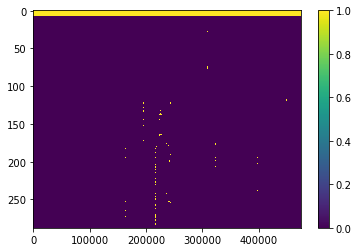

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(res_loter, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.savefig("brazil_rod_ref.png")

## all brazil in ref

In [16]:
brazil_hs   = vcf2npy("auto_beagle_loter_allbrazil_ref.vcf")
rodhaini_hs = vcf2npy("auto_beagle_loter_rodhaini_ref.vcf")
query_hs    = vcf2npy("auto_beagle_loter_nobrquery.vcf")

In [17]:
all_brazil_res_loter = lc.loter_smooth(l_H         = [brazil_hs, rodhaini_hs], 
                                       h_adm       = query_hs, 
                                       num_threads = 24) 

In [18]:
print(all_brazil_res_loter.shape)

(208, 475081)


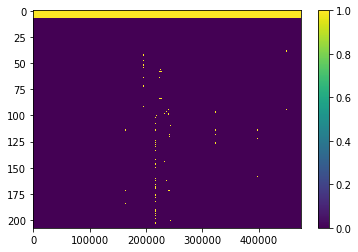

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(all_brazil_res_loter, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.savefig("allbrazil_rodhaini_ref.png")

In [42]:
import pandas as pd

loter_df = pd.DataFrame(all_brazil_res_loter)
loter_df

,0,1,2,3,4,5,6,7,8,9,...,475071,475072,475073,475074,475075,475076,475077,475078,475079,475080
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import vcf
vcf_reader = vcf.Reader(open('auto_beagle_loter_nobrquery.vcf', 'r'))

In [44]:
samples = vcf_reader.samples

hap_ids = []
for sample in samples:
    hap_ids.append("{}_H1".format(sample))
    hap_ids.append("{}_H2".format(sample))


pos_ids = []
for record in vcf_reader:
    pos_ids.append("{}:{}".format(record.CHROM, record.POS))

loter_df.index=hap_ids
loter_df.columns=pos_ids
loter_df

,SM_V7_1:302288,SM_V7_1:705190,SM_V7_1:705210,SM_V7_1:705322,SM_V7_1:705337,SM_V7_1:705340,SM_V7_1:705343,SM_V7_1:705389,SM_V7_1:705395,SM_V7_1:705396,...,SM_V7_7:19081315,SM_V7_7:19086933,SM_V7_7:19086979,SM_V7_7:19087032,SM_V7_7:19087089,SM_V7_7:19087103,SM_V7_7:19087106,SM_V7_7:19087132,SM_V7_7:19087217,SM_V7_7:19087225
Sro_female_2.2_CCTCTATC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_female_2.2_CCTCTATC_H2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_1.1_ATCATTCC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_1.1_ATCATTCC_H2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_2.1_CAAGGAGC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sm.TZ_141.6.1_H2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.7.1_H1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.7.1_H2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.8.1_H1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
loter_df.to_csv("all_brazil_v_rodhaini_loter.csv", sep=",")

In [6]:
loter_df = pd.read_csv("all_brazil_v_rodhaini_loter.csv", sep=",")

In [7]:
loter_df

,Unnamed: 0,SM_V7_1:302288,SM_V7_1:705190,SM_V7_1:705210,SM_V7_1:705322,SM_V7_1:705337,SM_V7_1:705340,SM_V7_1:705343,SM_V7_1:705389,SM_V7_1:705395,...,SM_V7_7:19081315,SM_V7_7:19086933,SM_V7_7:19086979,SM_V7_7:19087032,SM_V7_7:19087089,SM_V7_7:19087103,SM_V7_7:19087106,SM_V7_7:19087132,SM_V7_7:19087217,SM_V7_7:19087225
0,Sro_female_2.2_CCTCTATC_H1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Sro_female_2.2_CCTCTATC_H2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Sro_male_1.1_ATCATTCC_H1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Sro_male_1.1_ATCATTCC_H2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Sro_male_2.1_CAAGGAGC_H1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Sm.TZ_141.6.1_H2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,Sm.TZ_141.7.1_H1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,Sm.TZ_141.7.1_H2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,Sm.TZ_141.8.1_H1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sums=np.array(loter_df[8:].sum(axis=0))

array(['ERR046038_H1ERR046038_H2ERR539847_H1ERR539847_H2ERR539848_H1ERR539848_H2Sm.BR_PdV.1409_rep_H1Sm.BR_PdV.1409_rep_H2Sm.BR_PdV.1475_rep_H1Sm.BR_PdV.1475_rep_H2Sm.BR_PdV.2406_rep_H1Sm.BR_PdV.2406_rep_H2ERR103050_H1ERR103050_H2Sm.NE_Di158.1_H1Sm.NE_Di158.1_H2Sm.NE_Di186.1_H1Sm.NE_Di186.1_H2Sm.NE_Di238.1_H1Sm.NE_Di238.1_H2Sm.NE_Di297.1_H1Sm.NE_Di297.1_H2Sm.NE_Di297.2_H1Sm.NE_Di297.2_H2Sm.NE_Di68.2_H1Sm.NE_Di68.2_H2Sm.NE_Na376.2_H1Sm.NE_Na376.2_H2Sm.NE_Na381.1_H1Sm.NE_Na381.1_H2Sm.NE_Na39.1_H1Sm.NE_Na39.1_H2Sm.NE_Na40.1_H1Sm.NE_Na40.1_H2ERR103049_H1ERR103049_H2Sm.SN_Nd103.1_H1Sm.SN_Nd103.1_H2Sm.SN_Nd109.1_H1Sm.SN_Nd109.1_H2Sm.SN_Nd114.1_H1Sm.SN_Nd114.1_H2Sm.SN_Nd115.1_H1Sm.SN_Nd115.1_H2Sm.SN_Nd18.1_H1Sm.SN_Nd18.1_H2Sm.SN_Nd22.1_H1Sm.SN_Nd22.1_H2Sm.SN_Nd24.1_H1Sm.SN_Nd24.1_H2Sm.SN_Nd25.1_H1Sm.SN_Nd25.1_H2Sm.SN_Nd34.1_H1Sm.SN_Nd34.1_H2Sm.SN_Nd43.1_H1Sm.SN_Nd43.1_H2Sm.SN_Nd47.1_H1Sm.SN_Nd47.1_H2Sm.SN_Nd5.1_H1Sm.SN_Nd5.1_H2Sm.SN_Nd5.2_H1Sm.SN_Nd5.2_H2Sm.SN_Nd50.1_H1Sm.SN_Nd50.1_H2Sm.SN_Nd

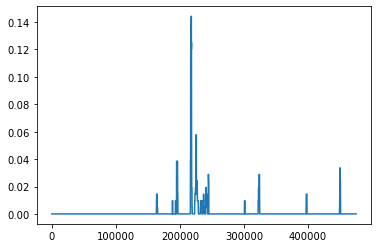

In [86]:
plt.plot((sums/208))
plt.savefig("freq.png")

In [100]:
loter_df[8:].T[(sums/200)>0.05]

,ERR046038_H1,ERR046038_H2,ERR539847_H1,ERR539847_H2,ERR539848_H1,ERR539848_H2,Sm.BR_PdV.1409_rep_H1,Sm.BR_PdV.1409_rep_H2,Sm.BR_PdV.1475_rep_H1,Sm.BR_PdV.1475_rep_H2,...,Sm.TZ_141.4.2_H1,Sm.TZ_141.4.2_H2,Sm.TZ_141.5.3_H1,Sm.TZ_141.5.3_H2,Sm.TZ_141.6.1_H1,Sm.TZ_141.6.1_H2,Sm.TZ_141.7.1_H1,Sm.TZ_141.7.1_H2,Sm.TZ_141.8.1_H1,Sm.TZ_141.8.1_H2
SM_V7_2:31708446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
SM_V7_2:31708450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
SM_V7_2:31708455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
SM_V7_2:31708474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
SM_V7_2:31708477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM_V7_2:36572420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SM_V7_2:36572431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SM_V7_2:36572435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SM_V7_2:36572495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
target_region

Index(['SM_V7_2:31708446', 'SM_V7_2:31708450', 'SM_V7_2:31708455',
       'SM_V7_2:31708474', 'SM_V7_2:31708477', 'SM_V7_2:31799799',
       'SM_V7_2:31799806', 'SM_V7_2:31800019', 'SM_V7_2:31800023',
       'SM_V7_2:31800027',
       ...
       'SM_V7_2:36572336', 'SM_V7_2:36572355', 'SM_V7_2:36572384',
       'SM_V7_2:36572406', 'SM_V7_2:36572409', 'SM_V7_2:36572420',
       'SM_V7_2:36572431', 'SM_V7_2:36572435', 'SM_V7_2:36572495',
       'SM_V7_2:36572498'],
      dtype='object', length=2402)

In [ ]:
#is this region introgressed or is it that the variants in 